# Project Scope

Use Seaborn and Matplotlib to create data visualizations that convey valuable insights into the relationship between GDP and life expectancy of six countries. The provided data will need to be preprocessed for optimal data analysis and visualization.


Goal: generate data visualizations that convey valuable insights into the relationship between GDP and life expectancy of six countries

Actions: write blog post describing findings

Data:
* GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

* Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Analysis: Relationships between data will be described using visualizations. 

Ethical Considerations: this data (national GDP by year) does not infringe on the privacy of any person or organization. The data is openly transparent and can be validated by anyone. The countries included in the data set are: Chile, China, Germany, Mexico, United States and Zimbabwe. These countries are relatively spread across many different categories included geographic location, culture, economy, etc, having included one country from Africa, Asia, Europe, and North, Central and South America. Limiting the dataset to only six countries restricts the datasets ability to be inclusive of all Country types, but in this case the six included are relatively spread.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels


# Data

## Import Data

In [ ]:
data = pd.read_csv('all_data.csv')

## Initial data inspection

* Inspect dataset for basic layout and characteristics (number of entries, columns, datatypes, nans, etc.)
* Print initial descriptive statistics
* Does the data need to be cleaned / prepared in any way?
* Are the any outliers in the data?

In [ ]:
data


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


* Luckily, there is no missing data in the dataset

In [ ]:
data.describe(include = 'all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Zimbabwe,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


* Rename all instances of 'United States of America' in the Country column to 'USA' so that visualizations look better down the line.

In [ ]:
data = data.replace('United States of America', 'USA')

* Print unique values from Country column
* Print unique values from Year column

# Initial Questions

* What is the time range ('Year' column) of the dataset?
* What are the mean median and mode of life expectancy and GDP generally?
* What are the mean median and mode of life expectancy and GDP seperated by country?
    * Is there some sort of pattern or anything of note here?
* How do GDP and life expectancy correlate with time?
    * Do countries have different GDP and LE vs time correlations?
* Does life expectancy correlate with GDP?
    * Do countries have different GDP vs LE correlations?


In [ ]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


* The Year column ranges from 2000 to 2015
* Mean and median life expectnacy and GDP were calculated above.
    * Mean life expectancy: 72.789583
    * Mean GDP: 76.750000
    * Median life expectancy: 3.880499e+12
    * Median GDP: 1.280220e+12

* Determining mean and median life expectancy and GDP by country:

In [ ]:
no_year = data.drop(['Year'], axis=1)
# Observe average and median life expectancy and GDP by country
print(no_year.groupby(['Country']).mean())
print(no_year.groupby(['Country']).median())

          Life expectancy at birth (years)           GDP
Country                                                 
Chile                             78.94375  1.697888e+11
China                             74.26250  4.957714e+12
Germany                           79.65625  3.094776e+12
Mexico                            75.71875  9.766506e+11
USA                               78.06250  1.407500e+13
Zimbabwe                          50.09375  9.062580e+09
          Life expectancy at birth (years)           GDP
Country                                                 
Chile                                79.00  1.729975e+11
China                                74.45  4.075195e+12
Germany                              79.85  3.396350e+12
Mexico                               75.65  1.004376e+12
USA                                  78.15  1.445000e+13
Zimbabwe                             47.40  6.733671e+09


# Visualizations

## Life Expectancy

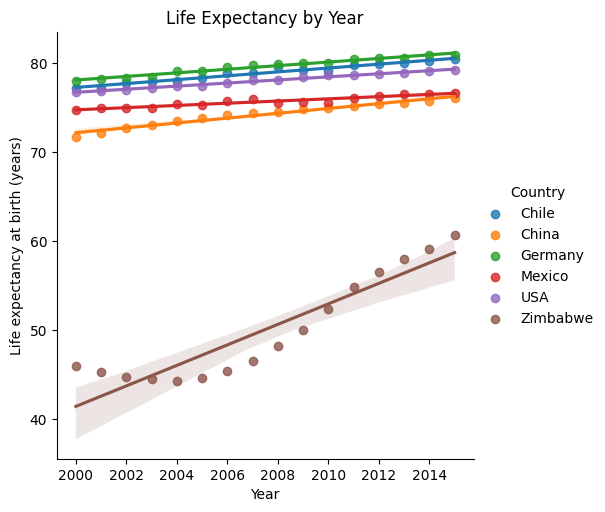

In [ ]:
le = sns.lmplot(data=data, x='Year', y="Life expectancy at birth (years)", hue='Country')
le.set(title='Life Expectancy by Year')

* Not all life expectancies are on the same scale which makes the above graph hard to interpret.
    * Seperating countries into multiple subplots with different scales for each plot will help with this issue

Text(0.5, 0.98, 'Life Expectancy by Year, Split by Country')

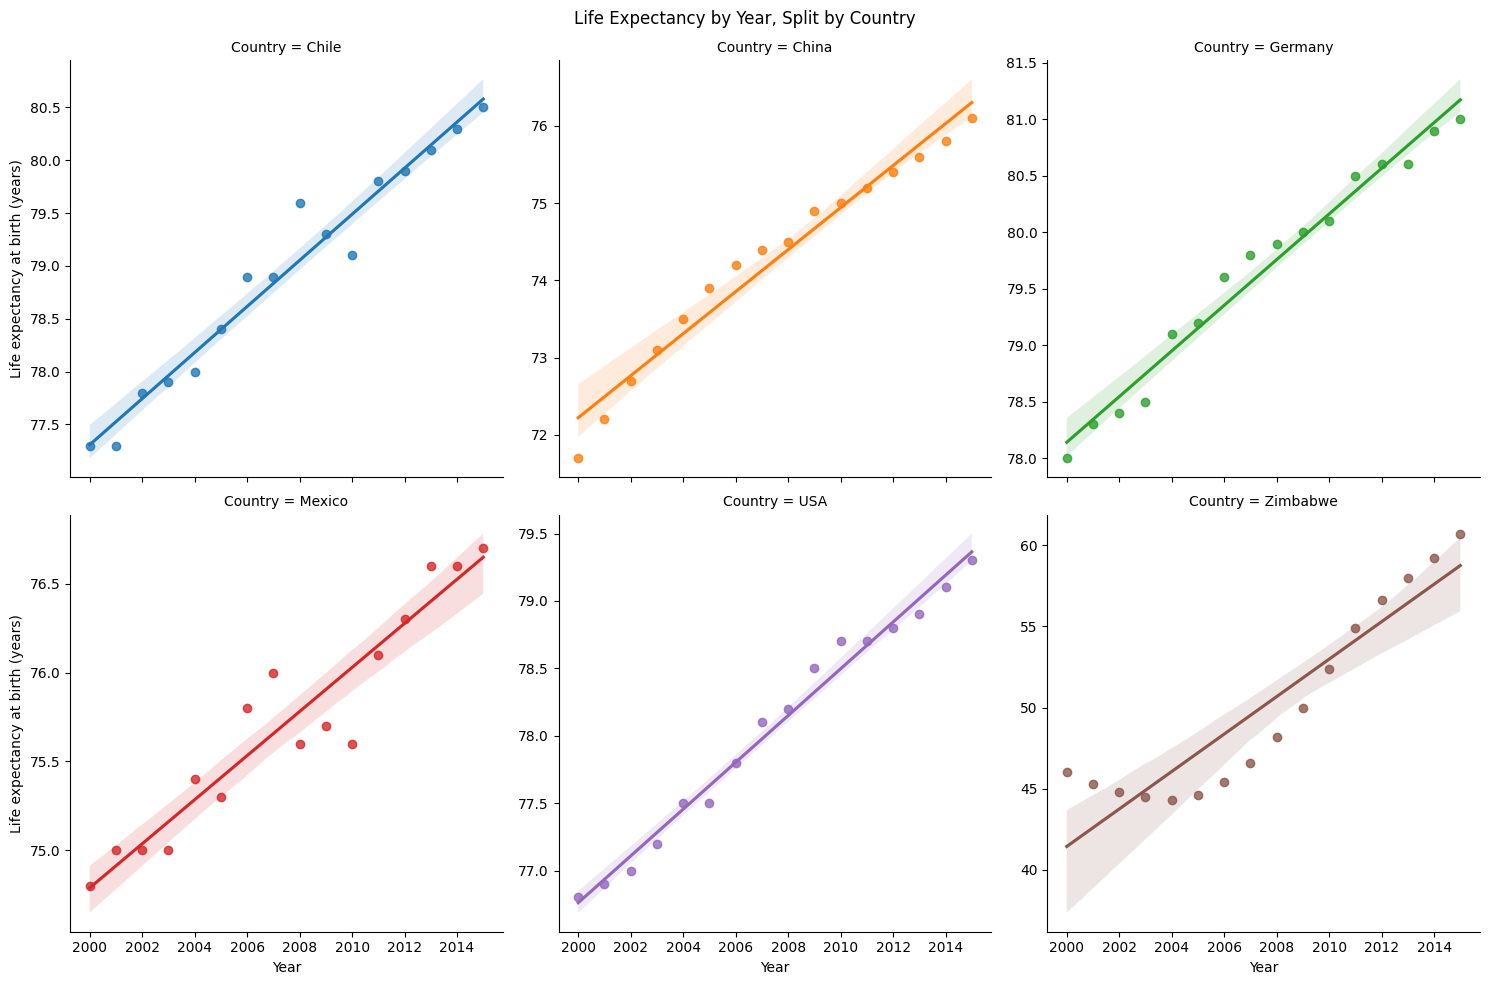

In [ ]:
le_split = sns.lmplot(data=data, x="Year", y="Life expectancy at birth (years)", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharey=False))
le_split.fig.subplots_adjust(top=.93)
le_split.fig.suptitle('Life Expectancy by Year, Split by Country')

## GDP

* Basically the same process implemented above for life expectancy will be repeated here for GDP

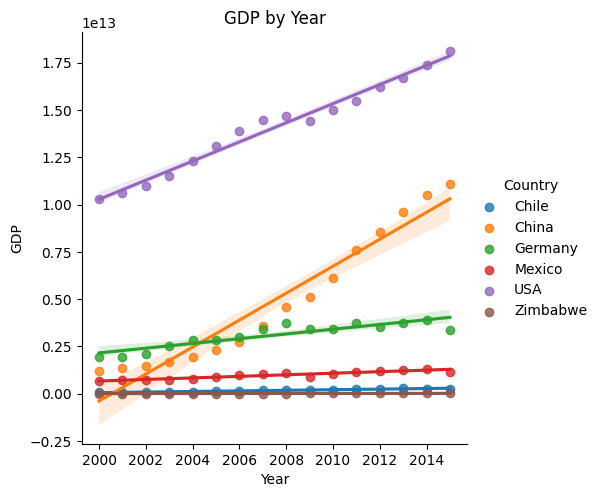

In [ ]:
gpd = sns.lmplot(data=data, x='Year', y="GDP", hue='Country')
gpd.set(title='GDP by Year')

Text(0.5, 0.98, 'GDP vs Year, Split by Country')

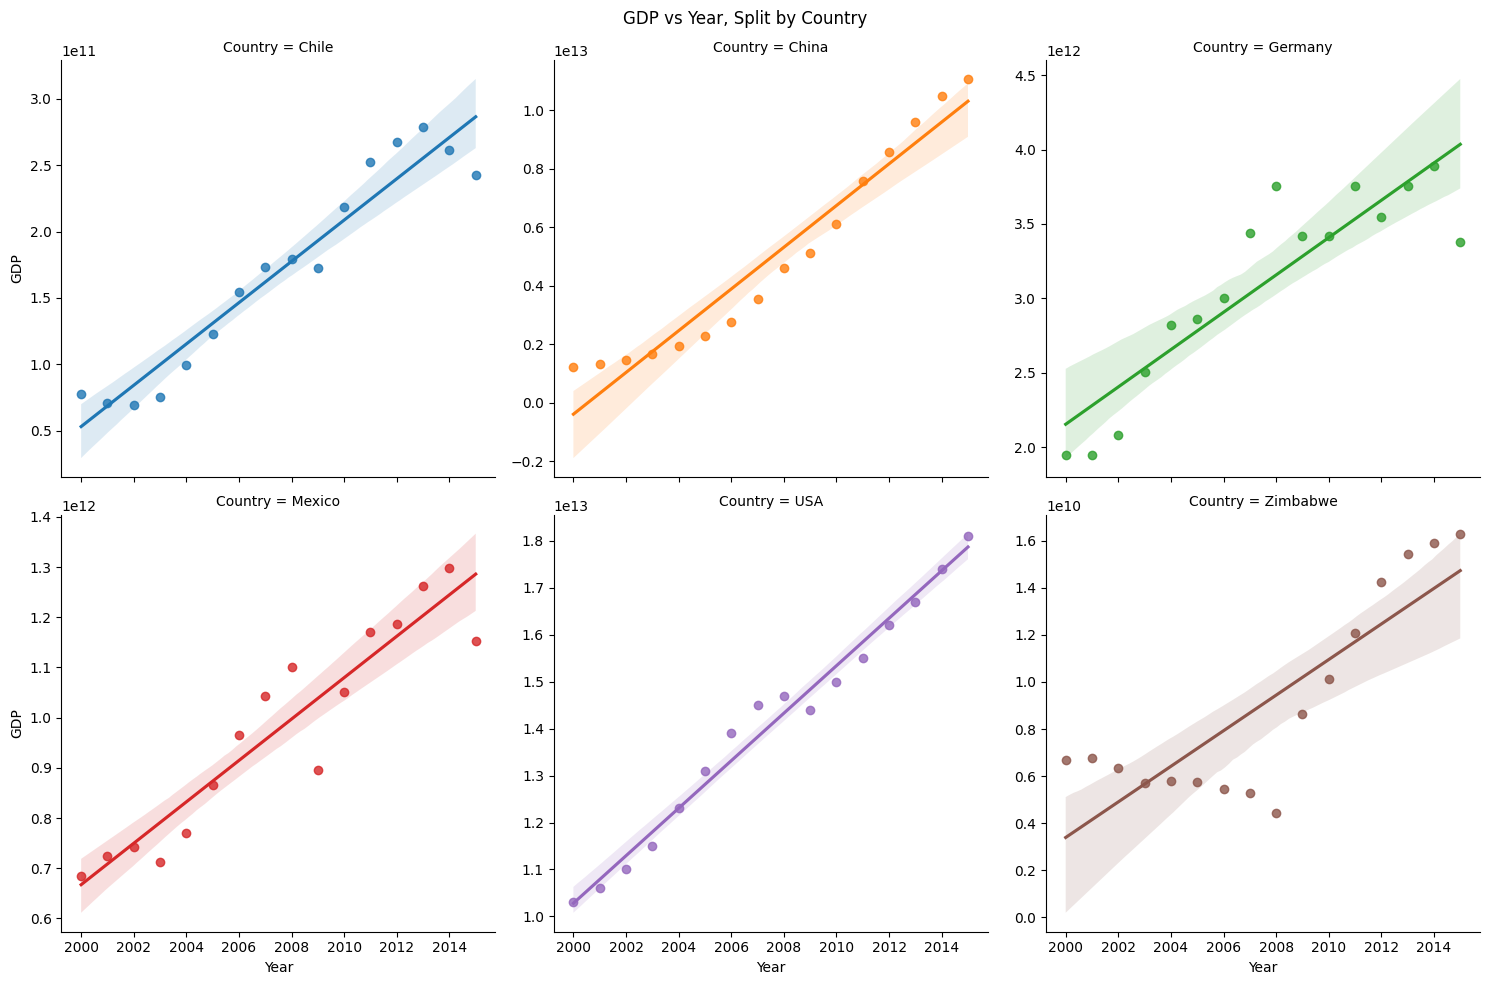

In [ ]:
gdp_split = sns.lmplot(data=data, x="Year", y="GDP", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharey=False))
gdp_split.fig.subplots_adjust(top=.93)
gdp_split.fig.suptitle('GDP vs Year, Split by Country')

## Life Expectancy vs GPD

How does life expectancy correlate with GPD?

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

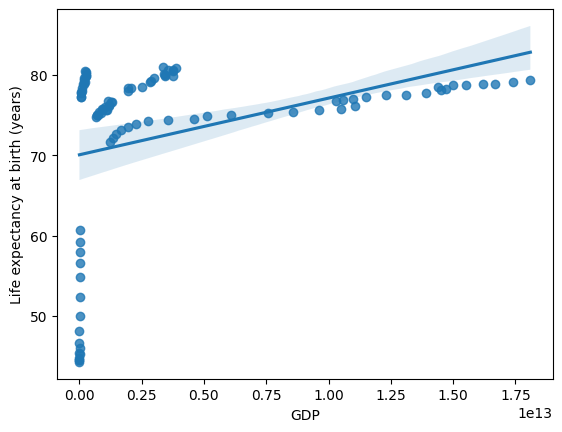

In [ ]:
le_gdp_all = sns.regplot(data=data, x='GDP', y='Life expectancy at birth (years)')
le_gdp_all.set(title='Life Expectancy vs GPD')

* Generate the same plot with data segmented by country, calculating a line of best fit for each country

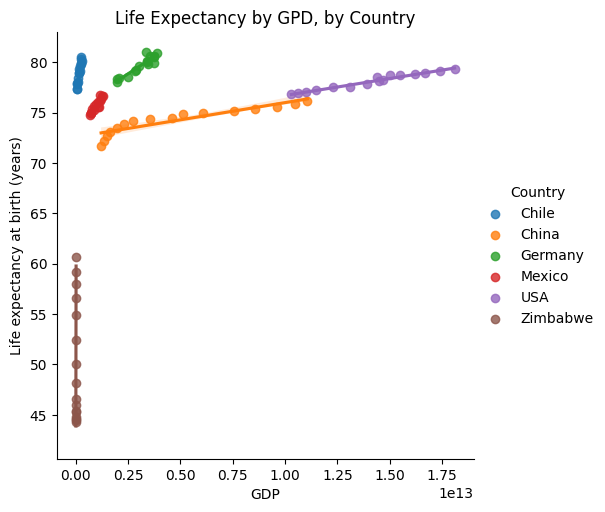

In [ ]:
le_gpd_country = sns.lmplot(data=data, x='GDP', y='Life expectancy at birth (years)', hue='Country')
le_gpd_country.set(title='Life Expectancy vs GPD, by Country')

* Generate the same plot segmented into subplots for each country

Text(0.5, 0.98, 'Life Expectancy by GPD, Split by Country')

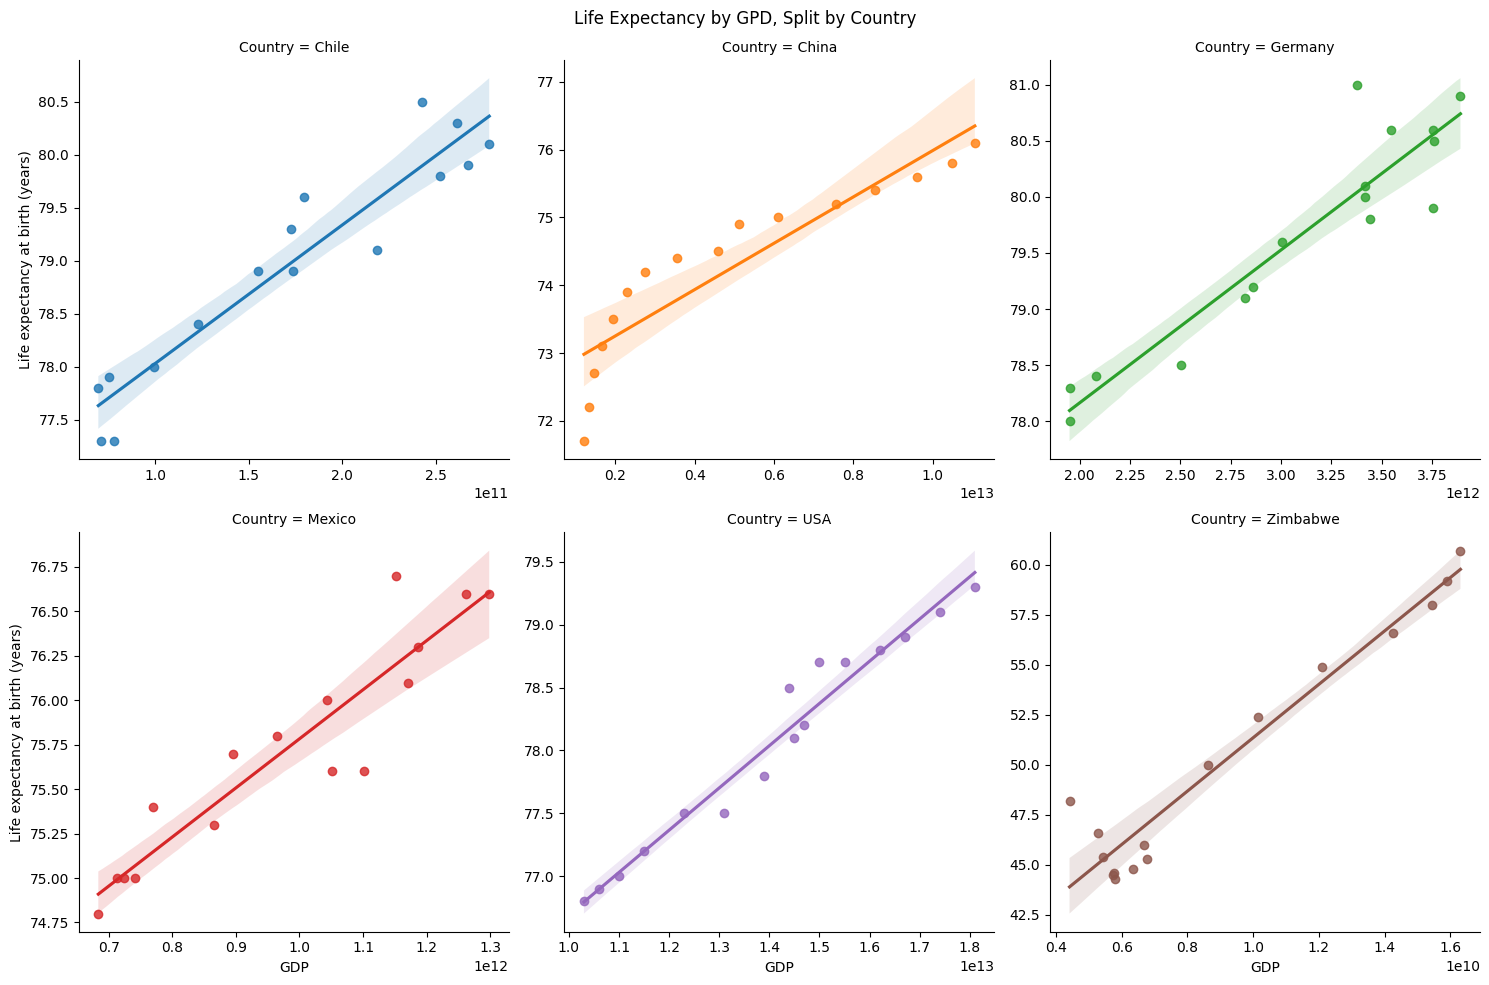

In [ ]:
le_gpd_country_split = sns.lmplot(data=data, x="GDP", y="Life expectancy at birth (years)", col="Country", hue='Country', col_wrap=3, facet_kws=dict(sharex=False, sharey=False))
le_gpd_country_split.fig.subplots_adjust(top=.93)
le_gpd_country_split.fig.suptitle('Life Expectancy vs GPD, Split by Country')

# Findings

## Returning to initial questions



* **What is the time range ('Year' column) of the dataset?**
    * The dataset ranges from the year 2000 to the year 2015
* **What are the mean median and mode of life expectancy and GDP generally?**
    * Mean life expectancy: 72.789583
    * Mean GDP: 76.750000
    * Median life expectancy: 3.880499e+12
    * Median GDP: 1.280220e+12
* **What are the mean and  median of life expectancy and GDP seperated by country?**
    * Mean:
        * Country: LE  GPD
        * Chile: 78.94  1.698e+11
        * China: 74.26  4.958e+12
        * Germany: 79.66 3.095e+12
        * Mexico: 75.72  9.767e+11
        * USA: 78.06  1.408e+13
        * Zimbabwe: 50.09  9.063e+09
    * Median:
        * Country: LE  GPD
        * Chile: 79.00  1.730e+11
        * China: 74.45  4.075e+12
        * Germany: 79.85  3.396e+12
        * Mexico: 75.65  1.004e+12
        * USA: 78.15  1.445e+13
        * Zimbabwe: 47.40  6.734e+09
    * **Is there some sort of pattern or anything of note here?**
        * Zimbabwe's median LE and GPD differ signifcantly from their means
            * When first noticed, this posed an intersting additional question
            * In the ensuing visualizations, it became evident Zimbabwe's mean and medians were so different because its LE and GPD didnt follow mostly linear trends like most of the other countries
* **How do GDP and life expectancy correlate with time?**
    * Best observed in the le_split plot
    * **Do countries have different GDP and LE vs time correlations?**
* **Does life expectancy correlate with GDP?**
    * **Do countries have different GDP vs LE correlations?**

## General findings and notes

Chile and Germany have higher life expectancy than USA while having significantly lower GDPs.

All Countries life expectancy and GDP were positively corelated over time. Of all six countries, USA has the lowest correlation between life expectancy and GDP. This should be investigated further.

Zimbabwe's life expectancy and GDP both intially trended downward, yet both rebounded with very positive rates of increase by the end of the time period. Life expecancy flipped from a negative trend to a positive trend before GDP, which is interesting (LE ~2005, GDP ~2009). This should be investigated in further detail. Zimbabwe's GDP change from 2008 to 2009 is significant.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73155aba-98a8-48cf-af65-0fc0fe878643' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>